## Pollutant Data from UCI Repository

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M') 
# Read data from file
data = pd.read_csv("zhongxin_data_2013_15.csv", usecols=['date', 'PM2_5', 'NO2', 'CO', 'TEMP'],
                   parse_dates=['date'], date_parser=dateparse)
data['date']=pd.to_datetime(data.date)
# drop all rows with NaN
data = data.dropna()

# Preview the data 
data.head()

,date,PM2_5,NO2,CO,TEMP
0,2013-03-01 00:00:00,4.0,7.0,300.0,-0.7
1,2013-03-01 01:00:00,8.0,7.0,300.0,-1.1
2,2013-03-01 02:00:00,7.0,10.0,300.0,-1.1
3,2013-03-01 03:00:00,6.0,11.0,300.0,-1.4
4,2013-03-01 04:00:00,3.0,12.0,300.0,-2.0


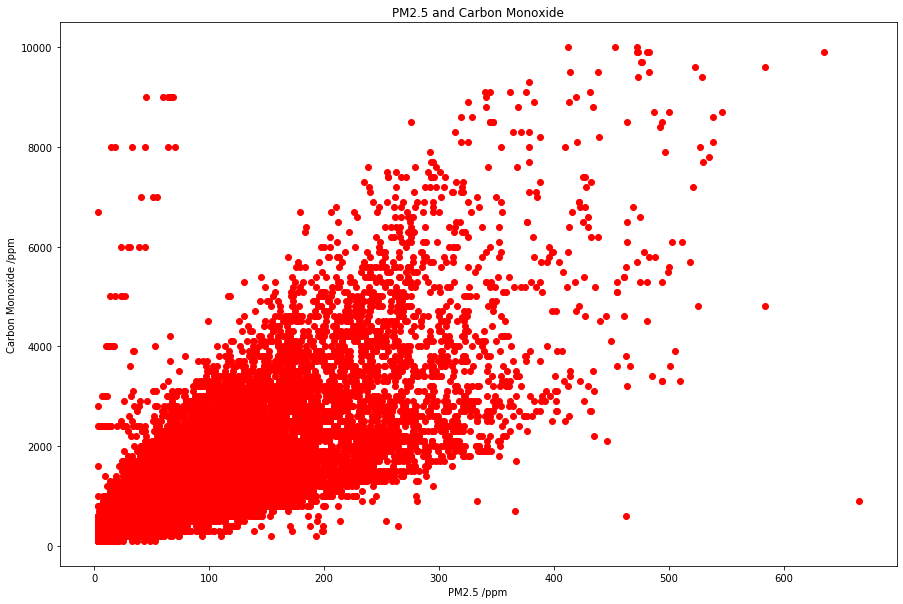

In [21]:
X = np.array(data['PM2_5'].dropna().values, dtype=float).reshape(-1, 1)
y = np.array(data['CO'].dropna().values, dtype=float).reshape(-1, 1)

plt.figure(figsize=(15,10))
plt.scatter(X, y, color='red')
plt.title('PM2.5 and Carbon Monoxide')
plt.xlabel('PM2.5 /ppm')
plt.ylabel('Carbon Monoxide /ppm')
plt.show()

# Split data into train/test sets

In [4]:
#80% training, 20% test set
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 1)

# Apply Linear Regression Model

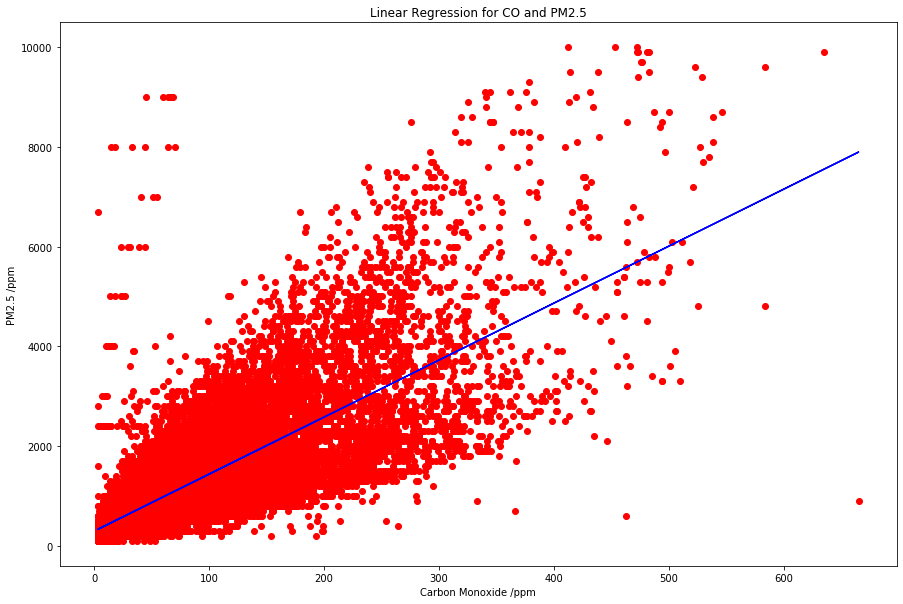

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
plt.figure(figsize=(15,10))
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression for CO and PM2.5')
plt.xlabel('Carbon Monoxide /ppm')
plt.ylabel('PM2.5 /ppm')
plt.show()

# Apply model to test set

In [23]:
pred_y = lin_reg.predict(test_x)

data = pd.DataFrame({'Actual': test_y[1:,0], 'Predicted': pred_y[1:,0]})
df1 = data.head(25)

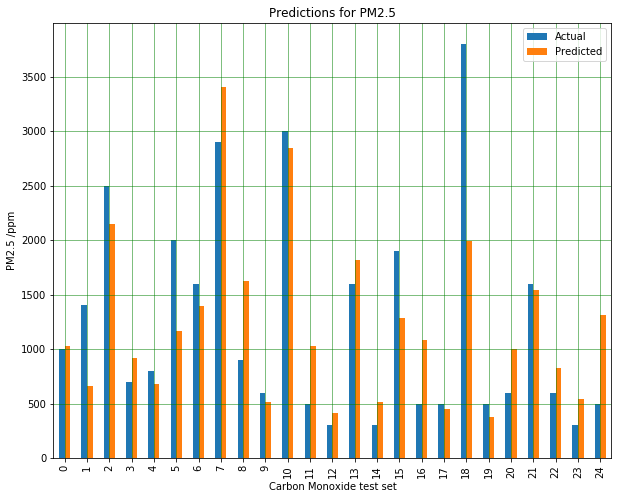

In [24]:
df1.plot(kind='bar',figsize=(10,8))
plt.title('Predictions for PM2.5')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Carbon Monoxide test set')
plt.ylabel('PM2.5 /ppm')
plt.show()

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))

Mean Absolute Error: 460.84606106649585
Mean Squared Error: 546915.4859200567
Root Mean Squared Error: 739.5373458589206
